In [44]:
import ebf
import numpy as np
import matplotlib.pyplot as plt
from start_plot import *
%matplotlib inline
trilegal = np.genfromtxt('/Users/astrolab/Dropbox/LSST/LocalGroup/280_m60_10_trilegal.dat',dtype=None, names=True)
#trilegal = np.genfromtxt('/Users/astrolab/Dropbox/Stream/DES/Nick_photometry/Stellar_OD_scripts/Trilegal/output272_-58.dat',dtype=None, names=True)

parsec = np.genfromtxt('/Users/astrolab/Work/UFD/ugali/isochrones/padova_v3/iso_a12.5_z0.00020.dat',\
                       dtype = None, names = True, skip_header=12)

distance to farthest star:  151 kpc
total number of stars:  38583


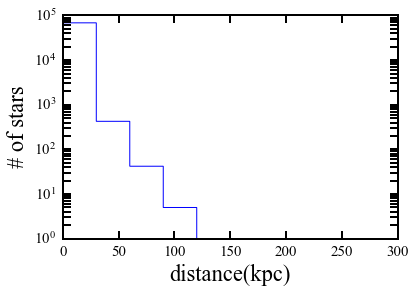

In [61]:
dm = trilegal['mM0']
d = 10**(dm/5+1) / 1000 # units in kpc

dm = 5*np.log10(d*1000)-5
plt.hist(d, range=[0,300],histtype='step')
plt.gca().set_yscale("log")
plt.xlabel('distance(kpc)')
plt.ylabel('# of stars')


print 'distance to farthest star: %4d kpc' %d.max()
abs_g = trilegal['g'] - dm
abs_r = trilegal['r'] - dm

app_g = trilegal['g']
app_r = trilegal['r']
popid = trilegal['Gc']
logg = trilegal['logg']
teff = trilegal['logTe'] # log(Teff)

magrange_mask = (app_g < 23)&(app_g > 16)
print 'total number of stars: %6d' %len(app_g[magrange_mask])

## Note here that the stars at outer radius from Trilegal is much smaller than that from Galaxia, though the total number of stars in two samples are similar

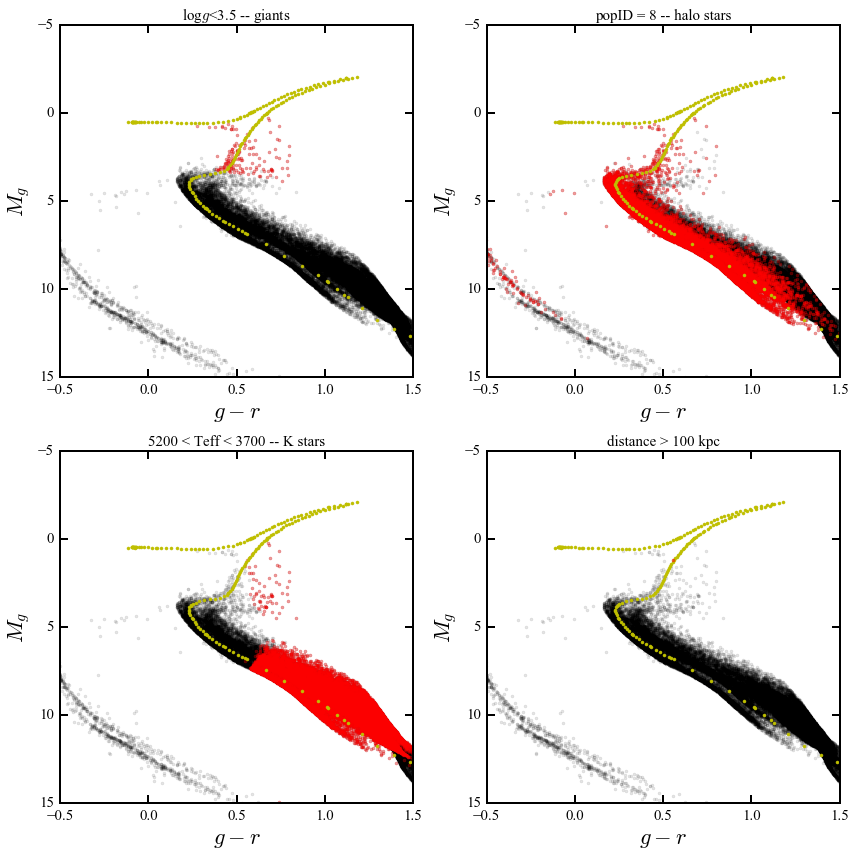

In [66]:
plt.figure(figsize=[12,12])

plt.subplot(2,2,1)
mask = (logg < 3.5)&magrange_mask
plt.plot(abs_g[magrange_mask]-abs_r[magrange_mask],abs_g[magrange_mask],'.k',alpha=0.1)
plt.plot(abs_g[mask]-abs_r[mask],abs_g[mask],'.r',alpha=0.3)
plt.plot(parsec['DESg']-parsec['DESr'], parsec['DESg'],'.y')
plt.ylim(15,-5)
plt.xlim(-0.5,1.5)
plt.xlabel('$g-r$')
plt.ylabel('$M_g$')
plt.title('log$g$<3.5 -- giants')

plt.subplot(2,2,2)
mask = (popid ==3)&magrange_mask
plt.plot(abs_g[magrange_mask]-abs_r[magrange_mask],abs_g[magrange_mask],'.k',alpha=0.1)
plt.plot(abs_g[mask]-abs_r[mask],abs_g[mask],'.r',alpha=0.3)
plt.plot(parsec['DESg']-parsec['DESr'], parsec['DESg'],'.y')
plt.ylim(15,-5)
plt.xlim(-0.5,1.5)
plt.xlabel('$g-r$')
plt.ylabel('$M_g$')
plt.title('popID = 8 -- halo stars')

plt.subplot(2,2,3)
mask = (teff > np.log10(3700)) & (teff < np.log10(5200))&magrange_mask
plt.plot(abs_g[magrange_mask]-abs_r[magrange_mask],abs_g[magrange_mask],'.k',alpha=0.1)
plt.plot(abs_g[mask]-abs_r[mask],abs_g[mask],'.r',alpha=0.3)
plt.plot(parsec['DESg']-parsec['DESr'], parsec['DESg'],'.y')
plt.ylim(15,-5)
plt.xlim(-0.5,1.5)
plt.xlabel('$g-r$')
plt.ylabel('$M_g$')
plt.title('5200 < Teff < 3700 -- K stars')

plt.subplot(2,2,4)
mask = (d > 100)&magrange_mask
plt.plot(abs_g[magrange_mask]-abs_r[magrange_mask],abs_g[magrange_mask],'.k',alpha=0.1)
plt.plot(parsec['DESg']-parsec['DESr'], parsec['DESg'],'.y')
plt.plot(abs_g[mask]-abs_r[mask],abs_g[mask],'.r',alpha=0.5)
plt.ylim(15,-5)
plt.xlim(-0.5,1.5)
plt.xlabel('$g-r$')
plt.ylabel('$M_g$')
plt.title('distance > 100 kpc')

plt.tight_layout()

## Note here that only one star has distance > 100 in the Trilegal sample

stars with 16 < g < 23, 0.5 < g-r < 1.0
# of giants:   140
# of dwarfs:  9792
median distance of giants:   7.9 kpc 

in range 16 < g < 17, 0.5 < g-r < 1.0
# of giants:    43, # of dwarfs:  508, median distance of giants:   4.0 kpc

in range 17 < g < 18, 0.5 < g-r < 1.0
# of giants:    39, # of dwarfs:  706, median distance of giants:   6.0 kpc

in range 18 < g < 19, 0.5 < g-r < 1.0
# of giants:    34, # of dwarfs:  913, median distance of giants:  11.8 kpc

in range 19 < g < 20, 0.5 < g-r < 1.0
# of giants:    15, # of dwarfs: 1166, median distance of giants:  15.1 kpc

in range 20 < g < 21, 0.5 < g-r < 1.0
# of giants:     4, # of dwarfs: 1563, median distance of giants:  21.1 kpc

in range 21 < g < 22, 0.5 < g-r < 1.0
# of giants:     3, # of dwarfs: 2092, median distance of giants:  39.8 kpc

in range 22 < g < 23, 0.5 < g-r < 1.0
# of giants:     2, # of dwarfs: 2835, median distance of giants:  43.8 kpc

in range 16 < g < 23, 0.5 < g-r < 0.6
# of giants:    79, # of dwarfs: 1695, m

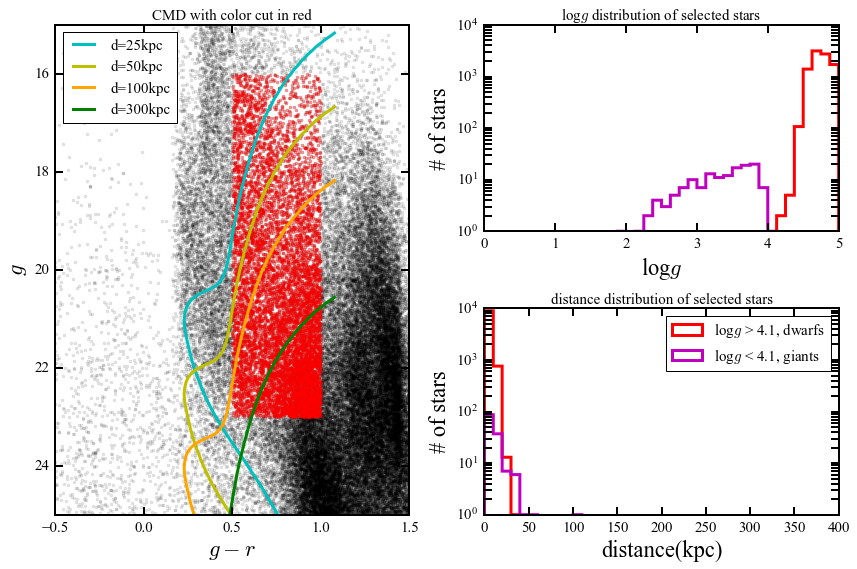

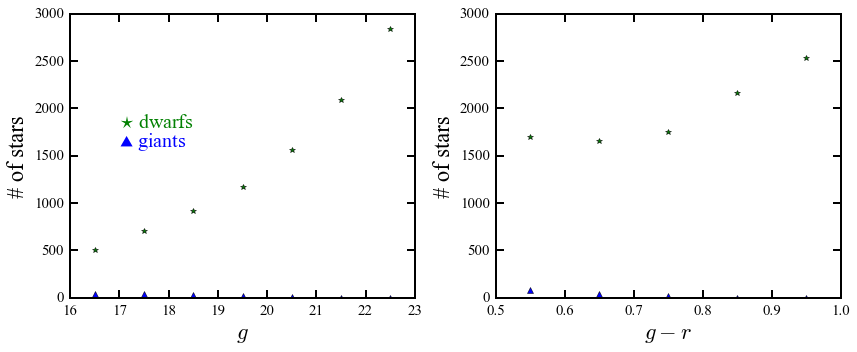

In [70]:
parsec_giant = parsec[:-82]

maskcolor = ((app_g - app_r)>0.5)&((app_g - app_r)<1.0)&magrange_mask

plt.figure(figsize=[12,8])
plt.subplot(1,2,1)
plt.plot(app_g-app_r,app_g,'.k',alpha=0.1)
plt.plot(app_g[maskcolor]-app_r[maskcolor],app_g[maskcolor],'.r',alpha=0.3)
d0 = 25 # 25 kpc
dm0 = 5*np.log10(d0*1000)-5
plt.plot(parsec_giant['DESg']-parsec_giant['DESr'], parsec_giant['DESg'] + dm0,'c', lw=3, label='d=25kpc')
d1 = 50 # 50 kpc
dm1 = 5*np.log10(d1*1000)-5
plt.plot(parsec_giant['DESg']-parsec_giant['DESr'], parsec_giant['DESg'] + dm1,'y', lw=3, label='d=50kpc')
d2 = 100 # 100 kpc
dm2 = 5*np.log10(d2*1000)-5
plt.plot(parsec_giant['DESg']-parsec_giant['DESr'], parsec_giant['DESg'] + dm2,'orange', lw=3, label='d=100kpc')
d3 = 300 # 300 kpc
dm3 = 5*np.log10(d3*1000)-5
plt.plot(parsec_giant['DESg']-parsec_giant['DESr'], parsec_giant['DESg'] + dm3,'g', lw=3, label='d=300kpc')
plt.legend(loc=2)
plt.ylim(25,15)
plt.xlim(-0.5,1.5)
plt.xlabel('$g-r$')
plt.ylabel('$g$')
plt.title('CMD with color cut in red')

mask1 = maskcolor&(logg>4.1)
mask2 = maskcolor&(logg<4.1)

plt.subplot(2,2,2)
plt.hist(logg[mask1],bins = 40,histtype='step',lw=3,range=[0,5],color='r',label='log$g$ > 4.1, dwarfs')
plt.hist(logg[mask2],bins = 40,histtype='step',lw=3,range=[0,5],color='m',label='log$g$ < 4.1, giants')
plt.gca().set_yscale("log")
plt.title('log$g$ distribution of selected stars')
plt.xlabel('log$g$')
plt.ylabel('# of stars')
plt.subplot(2,2,4)
plt.hist(d[mask1],bins = 40,histtype='step',lw=3,range=[0,400],color='r',label='log$g$ > 4.1, dwarfs')
plt.hist(d[mask2],bins = 40,histtype='step',lw=3,range=[0,400],color='m',label='log$g$ < 4.1, giants')
plt.legend()
plt.gca().set_yscale("log")
plt.title('distance distribution of selected stars')
plt.xlabel('distance(kpc)')
plt.ylabel('# of stars')

print 'stars with 16 < g < 23, 0.5 < g-r < 1.0'
print '# of giants: %5d' %len(d[mask2])
print '# of dwarfs: %5d' %len(d[mask1])
print 'median distance of giants: %5.1f kpc \n' %np.median(d[mask2])
plt.tight_layout()

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
def numcal(lowerlimit, upperlimit):
    mask1 = (logg>4.1)&((app_g - app_r)>0.5)&((app_g - app_r)<1.0)&(app_g < upperlimit)&(app_g > lowerlimit)
    mask2 = (logg<4.1)&((app_g - app_r)>0.5)&((app_g - app_r)<1.0)&(app_g < upperlimit)&(app_g > lowerlimit)
    return mask2, mask1

for i in range(16,23):
    (gc,dc) = numcal(i,i+1)
    plt.plot(i+0.5,len(d[gc]),'^b')
    plt.plot(i+0.5,len(d[dc]),'*g')
    print 'in range %2d < g < %2d, 0.5 < g-r < 1.0' %(i,i+1)
    print '# of giants: %5d, # of dwarfs: %4d, median distance of giants: %5.1f kpc\n' %(len(d[gc]), len(d[dc]), np.median(d[gc]))
plt.text(17,1800,'$\star$ dwarfs', color='g',fontsize=20)    
plt.text(17,1600,'$\\blacktriangle$ giants', color='b',fontsize=20)    
plt.xlabel('$g$')
plt.ylabel('# of stars')

plt.subplot(1,2,2)
def numcal(lowerlimit, upperlimit):
    mask1 = (logg>4.1)&((app_g - app_r)>lowerlimit)&((app_g - app_r)<upperlimit)&(app_g > 16)&(app_g < 23)
    mask2 = (logg<4.1)&((app_g - app_r)>lowerlimit)&((app_g - app_r)<upperlimit)&(app_g > 16)&(app_g < 23)
    return mask2, mask1

colorstep = 0.1
for i in np.arange(0.5,1,colorstep):
    (gc,dc) = numcal(i,i+colorstep)
    plt.plot(i+colorstep/2,len(d[gc]),'^b')
    plt.plot(i+colorstep/2,len(d[dc]),'*g')
    print 'in range 16 < g < 23, %3.1f < g-r < %3.1f' %(i,i+colorstep)
    print '# of giants: %5d, # of dwarfs: %4d, median distance of giants: %5.1f kpc\n' %(len(d[gc]), len(d[dc]), np.median(d[gc]))
plt.xlabel('$g-r$')
plt.ylabel('# of stars')
plt.xlim(0.5,1)

plt.tight_layout()
#plt.text(17,1800,'$\star$ dwarfs', color='g',fontsize=20)    
#plt.text(17,1600,'$\\blacktriangle$ giants', color='b',fontsize=20)    


stars with isochrone filter at distance =  50 kpc
# of giants:    64
# of dwarfs:  2635
median distance of giants:  18.6 kpc 

in range 16 < g < 17, 0.5 < g-r < 1.0
# of giants:     0, # of dwarfs:   47, median diatance of giants:   nan kpc

in range 17 < g < 18, 0.5 < g-r < 1.0
# of giants:     6, # of dwarfs:  246, median diatance of giants:   8.1 kpc

in range 18 < g < 19, 0.5 < g-r < 1.0
# of giants:    16, # of dwarfs:  369, median diatance of giants:   9.3 kpc

in range 19 < g < 20, 0.5 < g-r < 1.0
# of giants:    17, # of dwarfs:  490, median diatance of giants:  15.1 kpc

in range 20 < g < 21, 0.5 < g-r < 1.0
# of giants:    13, # of dwarfs:  609, median diatance of giants:  24.0 kpc

in range 21 < g < 22, 0.5 < g-r < 1.0
# of giants:     7, # of dwarfs:  695, median diatance of giants:  47.9 kpc

in range 22 < g < 23, 0.5 < g-r < 1.0
# of giants:     5, # of dwarfs:  175, median diatance of giants:  66.1 kpc

in range 16 < g < 23, 0.5 < g-r < 0.6
# of giants:    17, # of dwarf

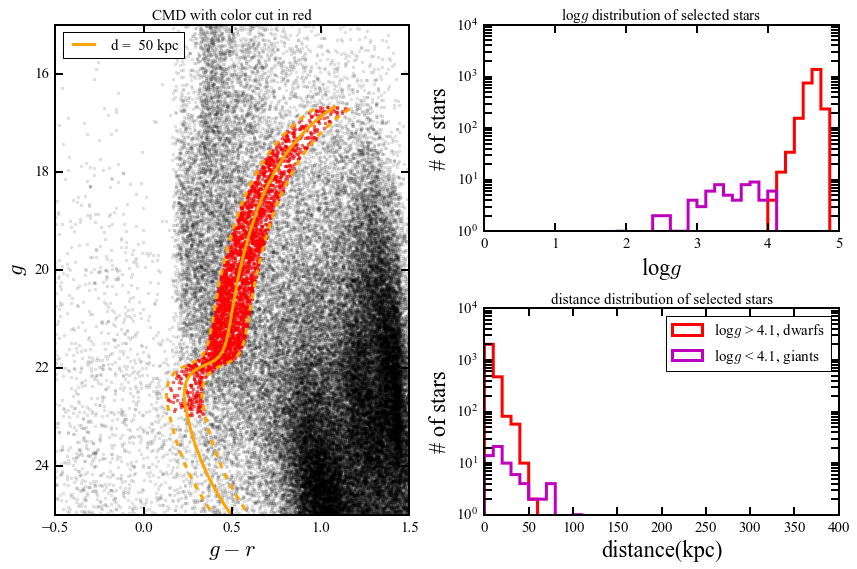

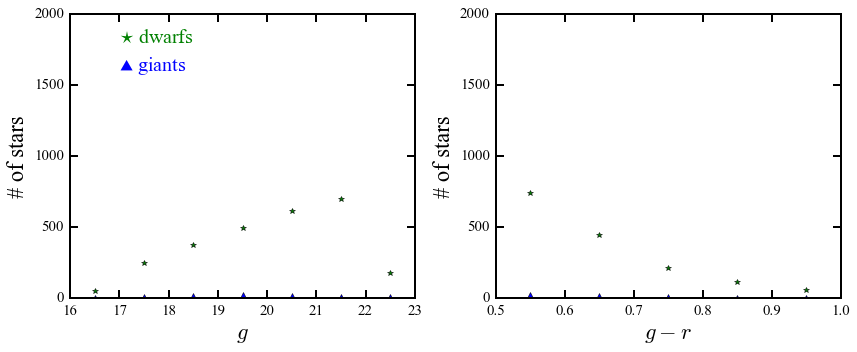

In [71]:
parsec_giant = parsec[:-82]

plt.figure(figsize=[12,8])
plt.subplot(1,2,1)
d2 = 50 # distance to earch in kpc
dm2 = 5*np.log10(d2*1000)-5


gmin = min(parsec_giant['DESg'][::-1]+dm2)
gmax = 23
parsec_magrange = (app_g > gmin) & (app_g < gmax)
gr = np.interp(app_g, parsec_giant['DESg'][::-1]+dm2,parsec_giant['DESg'][::-1]-parsec_giant['DESr'][::-1])

colorrange = parsec_magrange & (app_g-app_r< gr+0.1) & ((app_g-app_r > gr-0.1))

plt.plot(app_g-app_r,app_g,'.k',alpha=0.1)
plt.plot(app_g[colorrange]-app_r[colorrange],app_g[colorrange],'r.',alpha=0.5 )

plt.plot(parsec_giant['DESg']-parsec_giant['DESr'], parsec_giant['DESg']+ dm2,'orange', lw=3, label='d = %3d kpc'%d2)
plt.plot(parsec_giant['DESg']-parsec_giant['DESr']+0.1, parsec_giant['DESg'] + dm2,'orange', ls='--', lw=3)
plt.plot(parsec_giant['DESg']-parsec_giant['DESr']-0.1, parsec_giant['DESg'] + dm2,'orange', ls='--', lw=3)
plt.legend(loc=2)

plt.ylim(25,15)
plt.xlim(-0.5,1.5)
plt.xlabel('$g-r$')
plt.ylabel('$g$')
plt.title('CMD with color cut in red')


mask1 = colorrange&(logg>4.1)
mask2 = colorrange&(logg<4.1)

plt.subplot(2,2,2)
plt.hist(logg[mask1],bins = 40,histtype='step',lw=3,range=[0,5],color='r',label='log$g$ > 4.1, dwarfs')
plt.hist(logg[mask2],bins = 40,histtype='step',lw=3,range=[0,5],color='m',label='log$g$ < 4.1, giants')
plt.gca().set_yscale("log")
plt.title('log$g$ distribution of selected stars')
plt.xlabel('log$g$')
plt.ylabel('# of stars')
plt.subplot(2,2,4)
plt.hist(d[mask1],bins = 40,histtype='step',lw=3,range=[0,400],color='r',label='log$g$ > 4.1, dwarfs')
plt.hist(d[mask2],bins = 40,histtype='step',lw=3,range=[0,400],color='m',label='log$g$ < 4.1, giants')
plt.legend()
plt.gca().set_yscale("log")
plt.title('distance distribution of selected stars')
plt.xlabel('distance(kpc)')
plt.ylabel('# of stars')

print 'stars with isochrone filter at distance = %3d kpc' %(d2)
print '# of giants: %5d' %len(d[mask2])
print '# of dwarfs: %5d' %len(d[mask1])
print 'median distance of giants: %5.1f kpc \n' %np.median(d[mask2])

plt.tight_layout()

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
def numcal(lowerlimit, upperlimit):
    mask1 = (logg>4.1)&colorrange&(app_g < upperlimit)&(app_g > lowerlimit)
    mask2 = (logg<4.1)&colorrange&(app_g < upperlimit)&(app_g > lowerlimit)
    return mask2, mask1
plt.ylim(0,2000)

for i in range(16,23):
    (gc,dc) = numcal(i,i+1)
    plt.plot(i+0.5,len(d[gc]),'^b')
    plt.plot(i+0.5,len(d[dc]),'*g')
    print 'in range %2d < g < %2d, 0.5 < g-r < 1.0' %(i,i+1)
    print '# of giants: %5d, # of dwarfs: %4d, median diatance of giants: %5.1f kpc\n' %(len(d[gc]), len(d[dc]), np.median(d[gc]))
plt.text(17,1800,'$\star$ dwarfs', color='g',fontsize=20)    
plt.text(17,1600,'$\\blacktriangle$ giants', color='b',fontsize=20)    
plt.xlabel('$g$')
plt.ylabel('# of stars')
plt.ylim(0,2000)

plt.subplot(1,2,2)
def numcal(lowerlimit, upperlimit):
    mask1 = (logg>4.1)&colorrange&((app_g - app_r)>lowerlimit)&((app_g - app_r)<upperlimit)
    mask2 = (logg<4.1)&colorrange&((app_g - app_r)>lowerlimit)&((app_g - app_r)<upperlimit)
    return mask2, mask1

colorstep = 0.1
for i in np.arange(0.5,1,colorstep):
    (gc,dc) = numcal(i,i+colorstep)
    plt.plot(i+colorstep/2,len(d[gc]),'^b')
    plt.plot(i+colorstep/2,len(d[dc]),'*g')
    print 'in range 16 < g < 23, %3.1f < g-r < %3.1f' %(i,i+colorstep)
    print '# of giants: %5d, # of dwarfs: %4d, median diatance of giants: %5.1f kpc\n' %(len(d[gc]), len(d[dc]), np.median(d[gc]))
plt.xlabel('$g-r$')
plt.ylabel('# of stars')
plt.ylim(0,2000)
a = plt.xlim(0.5,1)
plt.tight_layout()



stars with isochrone filter at distance = 100 kpc
# of giants:    14
# of dwarfs:  2519
median distance of giants:  43.8 kpc 

in range 16 < g < 17, 0.5 < g-r < 1.0
# of giants:     0, # of dwarfs:    0, median diatance of giants:   nan kpc

in range 17 < g < 18, 0.5 < g-r < 1.0
# of giants:     0, # of dwarfs:    0, median diatance of giants:   nan kpc

in range 18 < g < 19, 0.5 < g-r < 1.0
# of giants:     0, # of dwarfs:  301, median diatance of giants:   nan kpc

in range 19 < g < 20, 0.5 < g-r < 1.0
# of giants:     1, # of dwarfs:  448, median diatance of giants:  15.8 kpc

in range 20 < g < 21, 0.5 < g-r < 1.0
# of giants:     3, # of dwarfs:  538, median diatance of giants:  24.0 kpc

in range 21 < g < 22, 0.5 < g-r < 1.0
# of giants:     6, # of dwarfs:  689, median diatance of giants:  52.7 kpc

in range 22 < g < 23, 0.5 < g-r < 1.0
# of giants:     4, # of dwarfs:  541, median diatance of giants:  47.9 kpc

in range 16 < g < 23, 0.5 < g-r < 0.6
# of giants:     6, # of dwarf

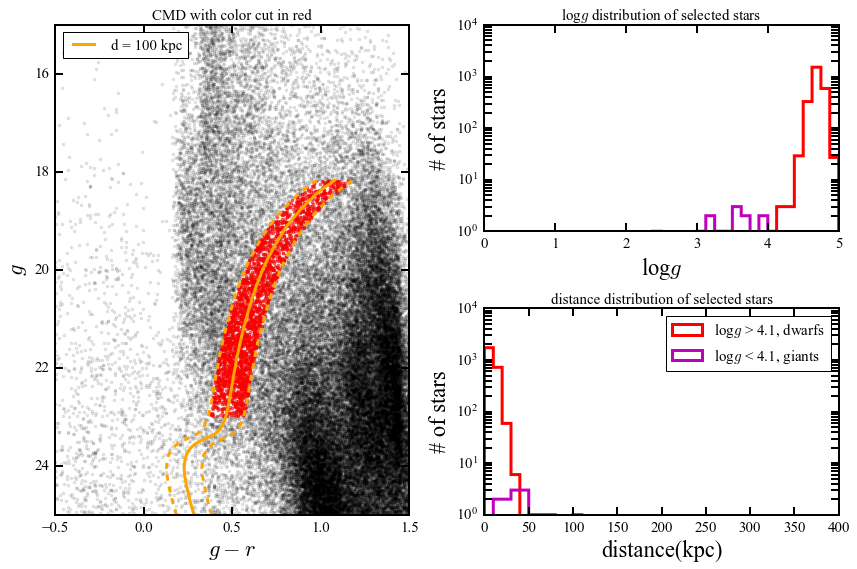

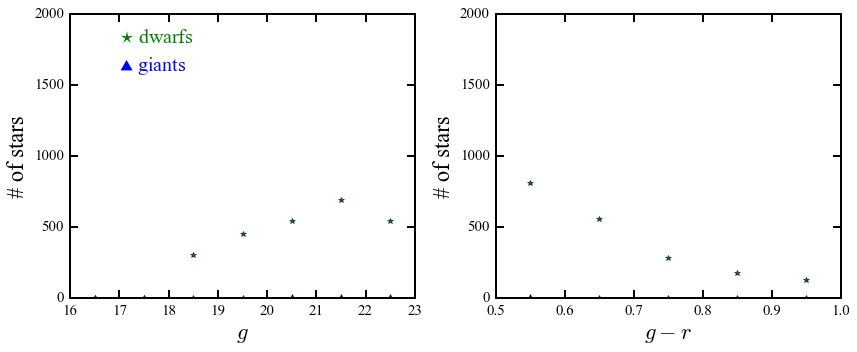

In [73]:
parsec_giant = parsec[:-82]

plt.figure(figsize=[12,8])
plt.subplot(1,2,1)
d2 = 100 # distance to earch in kpc
dm2 = 5*np.log10(d2*1000)-5


gmin = min(parsec_giant['DESg'][::-1]+dm2)
gmax = 23
parsec_magrange = (app_g > gmin) & (app_g < gmax)
gr = np.interp(app_g, parsec_giant['DESg'][::-1]+dm2,parsec_giant['DESg'][::-1]-parsec_giant['DESr'][::-1])

colorrange = parsec_magrange & (app_g-app_r< gr+0.1) & ((app_g-app_r > gr-0.1))

plt.plot(app_g-app_r,app_g,'.k',alpha=0.1)
plt.plot(app_g[colorrange]-app_r[colorrange],app_g[colorrange],'r.',alpha=0.5 )

plt.plot(parsec_giant['DESg']-parsec_giant['DESr'], parsec_giant['DESg']+ dm2,'orange', lw=3, label='d = %3d kpc'%d2)
plt.plot(parsec_giant['DESg']-parsec_giant['DESr']+0.1, parsec_giant['DESg'] + dm2,'orange', ls='--', lw=3)
plt.plot(parsec_giant['DESg']-parsec_giant['DESr']-0.1, parsec_giant['DESg'] + dm2,'orange', ls='--', lw=3)
plt.legend(loc=2)

plt.ylim(25,15)
plt.xlim(-0.5,1.5)
plt.xlabel('$g-r$')
plt.ylabel('$g$')
plt.title('CMD with color cut in red')


mask1 = colorrange&(logg>4.1)
mask2 = colorrange&(logg<4.1)

plt.subplot(2,2,2)
plt.hist(logg[mask1],bins = 40,histtype='step',lw=3,range=[0,5],color='r',label='log$g$ > 4.1, dwarfs')
plt.hist(logg[mask2],bins = 40,histtype='step',lw=3,range=[0,5],color='m',label='log$g$ < 4.1, giants')
plt.gca().set_yscale("log")
plt.title('log$g$ distribution of selected stars')
plt.xlabel('log$g$')
plt.ylabel('# of stars')
plt.subplot(2,2,4)
plt.hist(d[mask1],bins = 40,histtype='step',lw=3,range=[0,400],color='r',label='log$g$ > 4.1, dwarfs')
plt.hist(d[mask2],bins = 40,histtype='step',lw=3,range=[0,400],color='m',label='log$g$ < 4.1, giants')
plt.legend()
plt.gca().set_yscale("log")
plt.title('distance distribution of selected stars')
plt.xlabel('distance(kpc)')
plt.ylabel('# of stars')

print 'stars with isochrone filter at distance = %3d kpc' %(d2)
print '# of giants: %5d' %len(d[mask2])
print '# of dwarfs: %5d' %len(d[mask1])
print 'median distance of giants: %5.1f kpc \n' %np.median(d[mask2])

plt.tight_layout()

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
def numcal(lowerlimit, upperlimit):
    mask1 = (logg>4.1)&colorrange&(app_g < upperlimit)&(app_g > lowerlimit)
    mask2 = (logg<4.1)&colorrange&(app_g < upperlimit)&(app_g > lowerlimit)
    return mask2, mask1

for i in range(16,23):
    (gc,dc) = numcal(i,i+1)
    plt.plot(i+0.5,len(d[gc]),'^b')
    plt.plot(i+0.5,len(d[dc]),'*g')
    print 'in range %2d < g < %2d, 0.5 < g-r < 1.0' %(i,i+1)
    print '# of giants: %5d, # of dwarfs: %4d, median diatance of giants: %5.1f kpc\n' %(len(d[gc]), len(d[dc]), np.median(d[gc]))
plt.text(17,1800,'$\star$ dwarfs', color='g',fontsize=20)    
plt.text(17,1600,'$\\blacktriangle$ giants', color='b',fontsize=20)    
plt.xlabel('$g$')
plt.ylabel('# of stars')
plt.ylim(0,2000)

plt.subplot(1,2,2)
def numcal(lowerlimit, upperlimit):
    mask1 = (logg>4.1)&colorrange&((app_g - app_r)>lowerlimit)&((app_g - app_r)<upperlimit)
    mask2 = (logg<4.1)&colorrange&((app_g - app_r)>lowerlimit)&((app_g - app_r)<upperlimit)
    return mask2, mask1

colorstep = 0.1
for i in np.arange(0.5,1,colorstep):
    (gc,dc) = numcal(i,i+colorstep)
    plt.plot(i+colorstep/2,len(d[gc]),'^b')
    plt.plot(i+colorstep/2,len(d[dc]),'*g')
    print 'in range 16 < g < 23, %3.1f < g-r < %3.1f' %(i,i+colorstep)
    print '# of giants: %5d, # of dwarfs: %4d, median diatance of giants: %5.1f kpc\n' %(len(d[gc]), len(d[dc]), np.median(d[gc]))
plt.xlabel('$g-r$')
plt.ylabel('# of stars')
plt.xlim(0.5,1)
plt.ylim(0,2000)
plt.tight_layout()


stars with isochrone filter at distance = 300 kpc
# of giants:     0
# of dwarfs:  1973
median distance of giants:   nan kpc 

in range 16 < g < 17, 0.5 < g-r < 1.0
# of giants:     0, # of dwarfs:    0, median diatance of giants:   nan kpc

in range 17 < g < 18, 0.5 < g-r < 1.0
# of giants:     0, # of dwarfs:    0, median diatance of giants:   nan kpc

in range 18 < g < 19, 0.5 < g-r < 1.0
# of giants:     0, # of dwarfs:    0, median diatance of giants:   nan kpc

in range 19 < g < 20, 0.5 < g-r < 1.0
# of giants:     0, # of dwarfs:    0, median diatance of giants:   nan kpc

in range 20 < g < 21, 0.5 < g-r < 1.0
# of giants:     0, # of dwarfs:  394, median diatance of giants:   nan kpc

in range 21 < g < 22, 0.5 < g-r < 1.0
# of giants:     0, # of dwarfs:  855, median diatance of giants:   nan kpc

in range 22 < g < 23, 0.5 < g-r < 1.0
# of giants:     0, # of dwarfs:  721, median diatance of giants:   nan kpc

in range 16 < g < 23, 0.5 < g-r < 0.6
# of giants:     0, # of dwarf

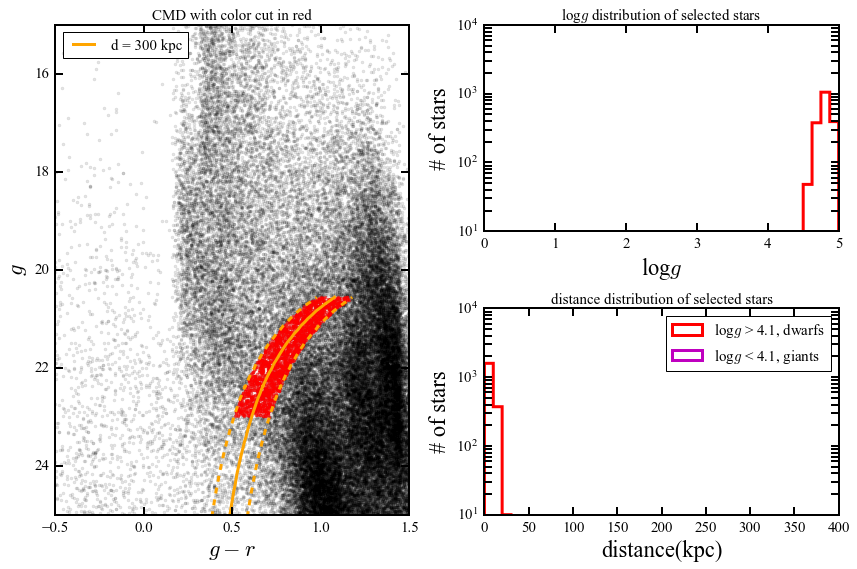

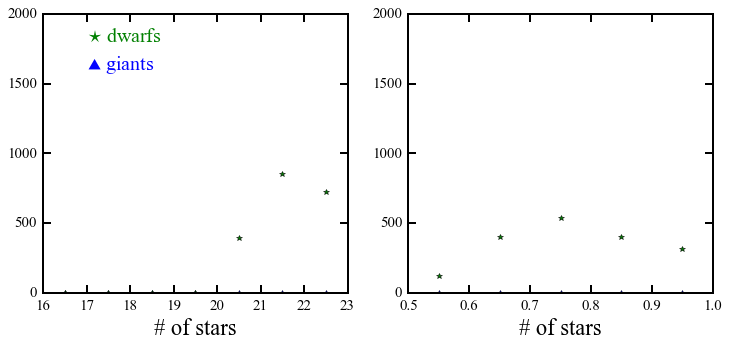

In [58]:
parsec_giant = parsec[:-82]

plt.figure(figsize=[12,8])
plt.subplot(1,2,1)
d2 = 300 # distance to earch in kpc
dm2 = 5*np.log10(d2*1000)-5


gmin = min(parsec_giant['DESg'][::-1]+dm2)
gmax = 23
parsec_magrange = (app_g > gmin) & (app_g < gmax)
gr = np.interp(app_g, parsec_giant['DESg'][::-1]+dm2,parsec_giant['DESg'][::-1]-parsec_giant['DESr'][::-1])

colorrange = parsec_magrange & (app_g-app_r< gr+0.1) & ((app_g-app_r > gr-0.1))

plt.plot(app_g-app_r,app_g,'.k',alpha=0.1)
plt.plot(app_g[colorrange]-app_r[colorrange],app_g[colorrange],'r.',alpha=0.5 )

plt.plot(parsec_giant['DESg']-parsec_giant['DESr'], parsec_giant['DESg']+ dm2,'orange', lw=3, label='d = %3d kpc'%d2)
plt.plot(parsec_giant['DESg']-parsec_giant['DESr']+0.1, parsec_giant['DESg'] + dm2,'orange', ls='--', lw=3)
plt.plot(parsec_giant['DESg']-parsec_giant['DESr']-0.1, parsec_giant['DESg'] + dm2,'orange', ls='--', lw=3)
plt.legend(loc=2)

plt.ylim(25,15)
plt.xlim(-0.5,1.5)
plt.xlabel('$g-r$')
plt.ylabel('$g$')
plt.title('CMD with color cut in red')


mask1 = colorrange&(logg>4.1)
mask2 = colorrange&(logg<4.1)

plt.subplot(2,2,2)
plt.hist(logg[mask1],bins = 40,histtype='step',lw=3,range=[0,5],color='r',label='log$g$ > 4.1, dwarfs')
plt.hist(logg[mask2],bins = 40,histtype='step',lw=3,range=[0,5],color='m',label='log$g$ < 4.1, giants')
plt.gca().set_yscale("log")
plt.title('log$g$ distribution of selected stars')
plt.xlabel('log$g$')
plt.ylabel('# of stars')
plt.subplot(2,2,4)
plt.hist(d[mask1],bins = 40,histtype='step',lw=3,range=[0,400],color='r',label='log$g$ > 4.1, dwarfs')
plt.hist(d[mask2],bins = 40,histtype='step',lw=3,range=[0,400],color='m',label='log$g$ < 4.1, giants')
plt.legend()
plt.gca().set_yscale("log")
plt.title('distance distribution of selected stars')
plt.xlabel('distance(kpc)')
plt.ylabel('# of stars')

print 'stars with isochrone filter at distance = %3d kpc' %(d2)
print '# of giants: %5d' %len(d[mask2])
print '# of dwarfs: %5d' %len(d[mask1])
print 'median distance of giants: %5.1f kpc \n' %np.median(d[mask2])

plt.tight_layout()

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
def numcal(lowerlimit, upperlimit):
    mask1 = (logg>4.1)&colorrange&(app_g < upperlimit)&(app_g > lowerlimit)
    mask2 = (logg<4.1)&colorrange&(app_g < upperlimit)&(app_g > lowerlimit)
    return mask2, mask1

for i in range(16,23):
    (gc,dc) = numcal(i,i+1)
    plt.plot(i+0.5,len(d[gc]),'^b')
    plt.plot(i+0.5,len(d[dc]),'*g')
    print 'in range %2d < g < %2d, 0.5 < g-r < 1.0' %(i,i+1)
    print '# of giants: %5d, # of dwarfs: %4d, median diatance of giants: %5.1f kpc\n' %(len(d[gc]), len(d[dc]), np.median(d[gc]))
plt.text(17,1800,'$\star$ dwarfs', color='g',fontsize=20)    
plt.text(17,1600,'$\\blacktriangle$ giants', color='b',fontsize=20)    
plt.xlabel('$g$')
plt.xlabel('# of stars')
plt.ylim(0,2000)

plt.subplot(1,2,2)
def numcal(lowerlimit, upperlimit):
    mask1 = (logg>4.1)&colorrange&((app_g - app_r)>lowerlimit)&((app_g - app_r)<upperlimit)
    mask2 = (logg<4.1)&colorrange&((app_g - app_r)>lowerlimit)&((app_g - app_r)<upperlimit)
    return mask2, mask1

colorstep = 0.1
for i in np.arange(0.5,1,colorstep):
    (gc,dc) = numcal(i,i+colorstep)
    plt.plot(i+colorstep/2,len(d[gc]),'^b')
    plt.plot(i+colorstep/2,len(d[dc]),'*g')
    print 'in range 16 < g < 23, %3.1f < g-r < %3.1f' %(i,i+colorstep)
    print '# of giants: %5d, # of dwarfs: %4d, median diatance of giants: %5.1f kpc\n' %(len(d[gc]), len(d[dc]), np.median(d[gc]))
plt.xlabel('$g-r$')
plt.ylabel('# of stars')
plt.ylim(0,2000)
plt.xlim(0.5,1)
plt.tight_layout()

